In [1]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rlmh_v1.vrptw import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P03_MSIE\T10_c202_25


In [2]:
folder = "R_20251120_123713"
prefix = "sol"
it = 83355

In [3]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_exp.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,idx_iteration,F,CR,MG,best_solution,convergence_rate,std_population,...,patience_remaining,F_sc,CR_sc,MG_sc,best_solution_sc,std_population_sc,best_trial_fitness_sc,std_trial_fitness_sc,patience_remaining_sc,TimeLimit.truncated
505,"[-0.10487839579582214, 0.3910726308822632, 0.4...",0.000076,False,5059,-2.097568,0.891073,0.997372,219.102539,1.0,101.406672,...,41,-0.104878,0.391073,0.497372,0.219103,0.101407,0.698065,0.053086,0.05125,False
506,"[-0.4037237763404846, -0.4404720366001129, 0.4...",0.000067,False,5069,-8.074476,0.059528,0.933590,219.102539,1.0,100.078910,...,31,-0.403724,-0.440472,0.433590,0.219103,0.100079,0.438958,0.076153,0.03875,False
507,"[-0.05492120981216431, 0.32920771837234497, 0....",0.000059,False,5079,-1.098424,0.829208,0.991808,219.102539,1.0,105.734070,...,21,-0.054921,0.329208,0.491808,0.219103,0.105734,0.694518,0.072613,0.02625,False
508,"[-0.398673415184021, -0.4516203999519348, 0.40...",0.000052,False,5089,-7.973468,0.048380,0.903100,219.102539,1.0,110.795917,...,11,-0.398673,-0.451620,0.403100,0.219103,0.110796,0.298323,0.119602,0.01375,False
509,"[-0.09305030107498169, 0.09741246700286865, 0....",0.000046,False,5099,-1.861006,0.597412,0.995778,219.102539,1.0,110.476089,...,1,-0.093050,0.097412,0.495778,0.219103,0.110476,0.645300,0.071516,0.00125,False


In [4]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_vrp.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 110.388444, Episode Length: 511, Best Solution: 219.10253906202578


Best global solution: 219.10253906202578


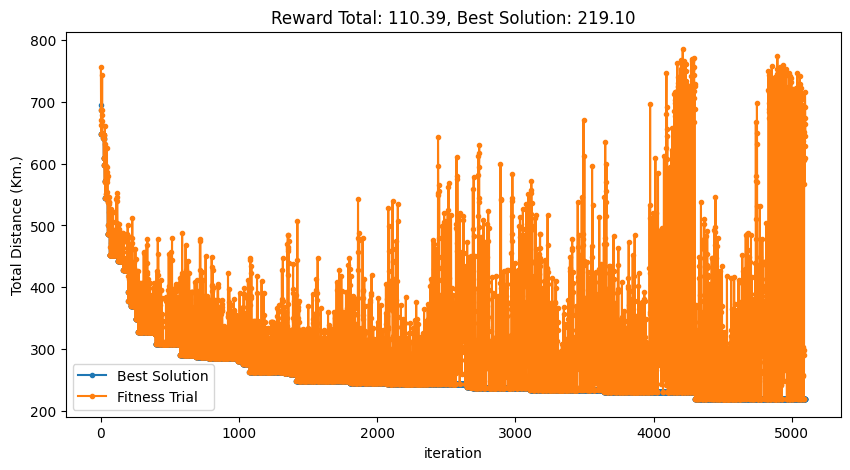

In [5]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history)
y2 = np.array(fitness_trial_history)
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [6]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

219.10253906202578


[0.27795427, 0.29133769, 0.2143847 , 0.21338118, 0.29994096, 0.39715977,
 0.23046128, 0.71251548, 0.63783791, 0.70007832, 0.66699371, 0.57501234,
 0.62514262, 0.57000119, 0.59934897, 0.56116038, 0.62437546, 0.44576619,
 0.50449988, 0.35574549, 0.93233434, 0.31358902, 0.42846697, 0.39124294,
 0.63214521, 0.69826902, 0.56506461, 0.69245946, 0.50680848, 0.90350855,
 0.26185859, 0.30585694, 0.22612257, 0.47870826, 0.88636452, 0.72127121,
 0.36165824, 0.6083879 , 0.48171247, 0.46828449, 0.90552691, 1.        ,
 0.33067983, 0.34105675, 0.56187891, 0.51195335, 0.60214921, 0.71295668,
 0.95996442, 0.1656359 ]


<Axes: >

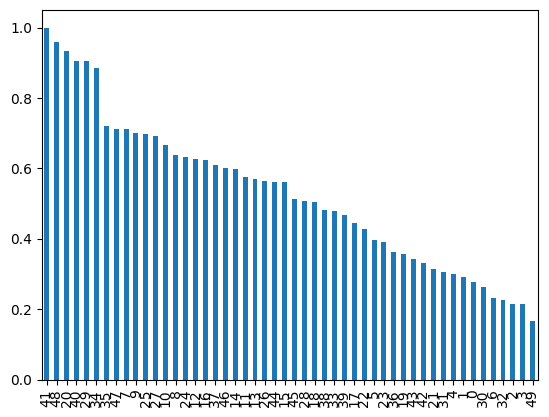

In [7]:
# How to visualize population
best_individual = population[idx_min]
string_representation = np.array2string(best_individual, separator=', ')
print(string_representation)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [8]:
vrptw.objective_func(population[idx_min])

219.10253906202578

In [9]:
exp.columns

Index(['action', 'reward', 'done', 'idx_iteration', 'F', 'CR', 'MG',
       'best_solution', 'convergence_rate', 'std_population',
       'total_iteration', 'best_trial_fitness', 'std_trial_fitness',
       'patience_remaining', 'F_sc', 'CR_sc', 'MG_sc', 'best_solution_sc',
       'std_population_sc', 'best_trial_fitness_sc', 'std_trial_fitness_sc',
       'patience_remaining_sc', 'TimeLimit.truncated'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

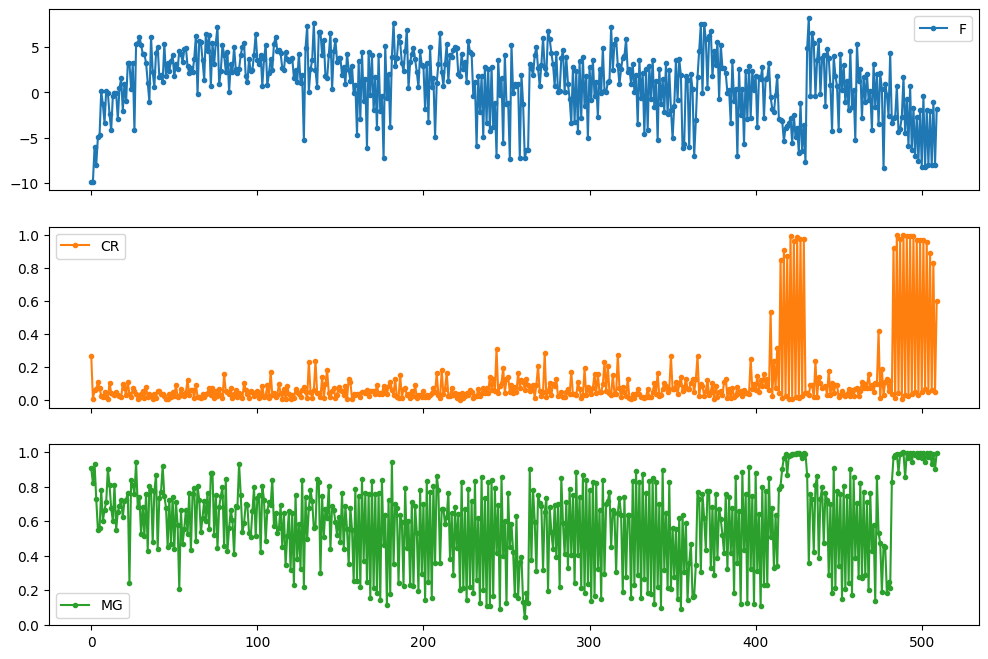

In [10]:
# Plot F, CR, MG over time in 3 subplots
exp[["F", "CR", "MG"]].plot(figsize=(12,8), marker=".", subplots=True)